# Machine Learning Classification - Telemarketing Data

Predictive Model to help  telemarketing team concentrate resources on more promising clients first.

Model Comparison:
- Linear Regression
- KNeighbors
- SVM: Support Vector Machines
- Decision Trees
- Random Forest Classifier

Data Source - 41,118 Bank Data between 2008 and 2013 and contains the results of a telemarketing campaign including customer’s response to the bank’s offer of a deposit contract.
- https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC                          # For large datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data/bank_telemarketing_data.csv',delimiter=',') #, decimal=','
df.head()
#df.shape

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Clean the data

#df.isnull().sum()
#df.dropna(subset = ['feature_name'], inplace=True)

In [4]:
# Transform non-numerical labels of the categorical variables to numerical and convert to integers

num = preprocessing.LabelEncoder()

num.fit(["admin.","blue-collar","entrepreneur","housemaid","management",
         "retired","self-employed","services","student","technician","unemployed","unknown"])
df['job']=num.transform(df['job']).astype('int')

num.fit(["divorced","married","single","unknown"])
df['marital']=num.transform(df['marital']).astype('int')

num.fit(["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"])
df['education']=num.transform(df['education']).astype('int')

#housing_loan
num.fit(["no","yes","unknown"])
df['housing']=num.transform(df['housing']).astype('int')

#personal_loan
num.fit(["no","yes","unknown"])
df['loan']=num.transform(df['loan']).astype('int')

num.fit(["failure","nonexistent","success"])
df['poutcome']=num.transform(df['poutcome']).astype('int')

num.fit(["yes","no"])
df['y']=num.transform(df['y']).astype('int')

In [5]:
# Standardize the numerical values of the other features - removes mean and scales to unit variance

scaler=StandardScaler()

df['cons.price.idx'] = scaler.fit_transform(df[['cons.price.idx']]).reshape(-1,1)
df['cons.conf.idx'] = scaler.fit_transform(df[['cons.conf.idx']]).reshape(-1,1)
df['euribor3m'] = scaler.fit_transform(df[['euribor3m']]).reshape(-1,1)


In [6]:
# Rank features using recursive feature elimination (RFE) method and Random Forest Classifier algorithm as estimator

X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing', 'loan', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])

rfc = RandomForestClassifier(n_estimators=40)
rfe = RFE(rfc, 6)
rfe_fit = rfe.fit(X, y)

print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 6
Selected Features: [ True  True False  True False False  True False  True  True]
Feature Ranking: [1 1 3 1 2 4 1 5 1 1]


In [7]:
X = np.asarray(df[['age', 'job', 'marital','education', 'housing',
                   'emp.var.rate','cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])

In [8]:
# Check for class imbalance
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [9]:
# Oversampling : you duplicate the observations of the minority class to obtain a balanced dataset.
# Undersampling : you drop observations of the majority class

# oversampling is BETTER because you keep all the information in the training dataset.

# SMOTE - Synthetic Minority Over-sampling Technique

#sm=SMOTE(sampling_strategy='auto') #ratio='auto', #kind='regular' - Deprecated
sm=SVMSMOTE(sampling_strategy='auto')   #SVMSMOTE to use old version
X_sampled,y_sampled=sm.fit_sample(X,y)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0)

In [11]:
lr = LogisticRegression(C=1, solver='lbfgs')
knc = KNeighborsClassifier(n_neighbors=8)
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
svc = SVC(gamma='auto')

In [12]:
# *** SVM takes long to run

for i in (lr,knc,dtree,rfc,svc):    #svc F1 score == 
        i.fit(X_train,y_train)
        print (i.__class__.__name__, 'F1 score =', f1_score(y_test,i.predict(X_test)))

LogisticRegression F1 score = 0.7883173722754259
KNeighborsClassifier F1 score = 0.8574911947981577
DecisionTreeClassifier F1 score = 0.8346712449538305
RandomForestClassifier F1 score = 0.9238991412388088
SVC F1 score = 0.8260141421659843


In [13]:
yhat = rfc.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10857
           1       0.93      0.91      0.92     11072

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



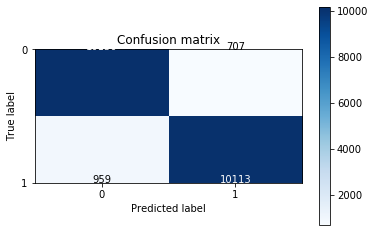

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(confusion_matrix(y_test, yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')